In [23]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [1]:
!ls /mnt/workspace/interpret-cxr-test-public-jpg/

test_public  test_public.csv


In [3]:
import pandas as pd
from IPython.display import Image

In [3]:
df = pd.read_csv('/mnt/workspace/interpret-cxr-test-public-jpg/test_public.csv')

In [4]:
df

,images_path,findings,impression
0,['/mnt/researchers/denis-parra/datasets/interp...,Bedside upright AP radiograph of the chest dem...,1. Mild chronic congestive heart failure with ...
1,['/mnt/researchers/denis-parra/datasets/interp...,"Since most recent chest radiograph, there has ...",Right IJ central venous catheter terminates pr...
2,['/mnt/researchers/denis-parra/datasets/interp...,NaN,There has been interval increase in right lowe...
3,['/mnt/researchers/denis-parra/datasets/interp...,"As compared to the previous radiograph, the kn...",NaN
4,['/mnt/researchers/denis-parra/datasets/interp...,There are no focal opacities. The patient has ...,No evidence of acute cardiopulmonary process.
...,...,...,...
3672,['/mnt/researchers/denis-parra/datasets/interp...,"The lungs are clear. There is no effusion, con...",Normal chest x-ray.
3673,['/mnt/researchers/denis-parra/datasets/interp...,Lungs are relatively hyperinflated with the ca...,No definite acute cardiopulmonary process.
3674,['/mnt/researchers/denis-parra/datasets/interp...,The lungs are well expanded and clear. Coarsen...,No acute cardiopulmonary process. Unchanged ca...
3675,['/mnt/researchers/denis-parra/datasets/interp...,Bibasilar opacities are again seen silhouettin...,Moderate bilateral pleural effusions with adja...


In [7]:
df.iloc[0]['images_path']

"['/mnt/researchers/denis-parra/datasets/interpret-cxr-test-public-jpg/test_public/image_1_view_0.jpg']"

In [11]:
eval(df['images_path'][0])

['/mnt/researchers/denis-parra/datasets/interpret-cxr-test-public-jpg/test_public/image_1_view_0.jpg']

In [12]:
from collections import Counter

Counter(len(eval(x)) for x in df['images_path'])

Counter({1: 1832, 2: 1461, 4: 38, 3: 345, 5: 1})

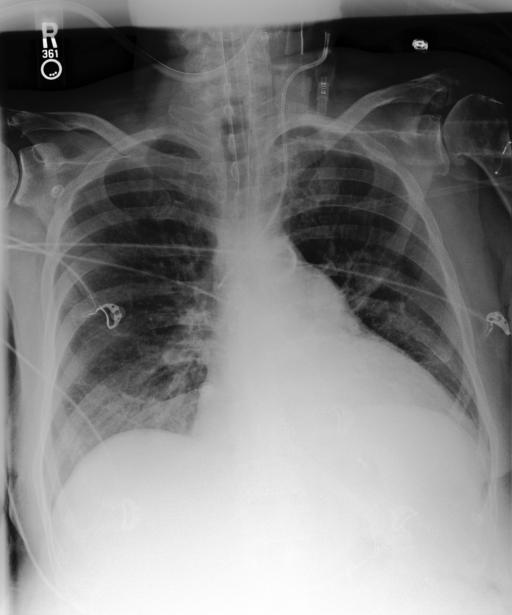

In [8]:
Image('/mnt/workspace/interpret-cxr-test-public-jpg/test_public/image_1_view_0.jpg')

In [1]:
!ls /mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge

test_hidden.csv  train.csv	   val.csv
test_public.csv  train_mimic.json  val_mimic.json


In [2]:
from medvqa.utils.files import load_json

In [3]:
train_mimic = load_json('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/train_mimic.json')

In [5]:
len(train_mimic)

217190

In [6]:
train_mimic[0]

{'findings': 'PA and lateral views of the chest were provided. There is no significant interval change from the recent CT and chest radiographs. Extensive fibrosis and upper lobe scarring is unchanged. An ovoid density in the right mid lung corresponds to a calcification on prior CT. There is slight upward retraction of the pulmonary hila, unchanged. The heart and mediastinal contour is unchanged. No evidence of superimposed pneumonia.',
 'images': ['files/p18/p18458464/s53740823/ff5c5ccc-4883ce56-777c2507-f0ead07a-2418d636.jpg',
  'files/p18/p18458464/s53740823/bc469234-01b22203-5b4ccb7a-c7dffa40-be3e61b1.jpg'],
 'images_path': ['files/p18/p18458464/s53740823/ff5c5ccc-4883ce56-777c2507-f0ead07a-2418d636.jpg',
  'files/p18/p18458464/s53740823/bc469234-01b22203-5b4ccb7a-c7dffa40-be3e61b1.jpg'],
 'impression': 'Extensive scarring without superimposed pneumonia. Ovoid nodular opacity in the right mid lung corresponds with known calcification on prior CT.',
 'source': 'MIMIC-CXR'}

In [7]:
val_mimic = load_json('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/val_mimic.json')

In [8]:
len(val_mimic)

5568

In [9]:
val_mimic[0]

{'findings': '',
 'images': ['files/p10/p10052926/s51808680/e1ab22aa-40416991-f233c1d3-bfcde28d-7612f5ac.jpg',
  'files/p10/p10052926/s51808680/660087a4-dbb7294b-fc377cbe-0eb9c4e7-9291ecd5.jpg'],
 'images_path': ['files/p10/p10052926/s51808680/e1ab22aa-40416991-f233c1d3-bfcde28d-7612f5ac.jpg',
  'files/p10/p10052926/s51808680/660087a4-dbb7294b-fc377cbe-0eb9c4e7-9291ecd5.jpg'],
 'impression': 'In comparison with the study of ___, the left costophrenic angle is clear. There may be minimal basilar atelectatic changes. The cardiac silhouette is mildly enlarged for at the upper limits of normal in size and there is some tortuosity of the aorta. No definite vascular congestion or acute focal pneumonia.',
 'source': 'MIMIC-CXR'}

In [4]:
train_df = pd.read_csv('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/train.csv')
val_df = pd.read_csv('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/val.csv')
test_public_df = pd.read_csv('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/test_public.csv')
test_hidden_df = pd.read_csv('/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/test_hidden.csv')

In [38]:
train_df[train_df.source == 'BIMCV-COVID19'][['findings']]

,findings
7,The radiology of the explored anatomical regio...
20,Small peripheral bilateral alveolar infiltrate...
30,Portable ap chest x-ray showing an endotrachea...
33,Chest x-ray. it is compared with the radiograp...
44,Information on covid. ap chest x-ray. it is co...
...,...
333169,Stability of lung opacities compared to previo...
333171,"This is compared with the x-ray from march 21,..."
333193,Without significant alterations.
333201,The same opacities recorded persist without ch...


In [40]:
val_df[val_df.source == 'BIMCV-COVID19'].images_path.values[:4]

array(["['/mnt/researchers/denis-parra/datasets/interpret-cxr-train-public-jpg/val/image_1_view_0.jpg', '/mnt/researchers/denis-parra/datasets/interpret-cxr-train-public-jpg/val/image_1_view_1.jpg']",
       "['/mnt/researchers/denis-parra/datasets/interpret-cxr-train-public-jpg/val/image_2_view_0.jpg']",
       "['/mnt/researchers/denis-parra/datasets/interpret-cxr-train-public-jpg/val/image_12_view_0.jpg']",
       "['/mnt/researchers/denis-parra/datasets/interpret-cxr-train-public-jpg/val/image_13_view_0.jpg']"],
      dtype=object)

In [41]:
val_df[val_df.source == 'BIMCV-COVID19'].images_path_old.values[:4]

array(["['data/bimcv-covid19//images/sub-S313117_ses-E32529_run-1_bp-chest_vp-pa_dx.png'\n 'data/bimcv-covid19//images/sub-S313117_ses-E32529_run-1_bp-chest_vp-lateral_dx.png']",
       "['data/bimcv-covid19//images/sub-S318300_ses-E37875_run-1_bp-chest_vp-ap_dx.png']",
       "['data/bimcv-covid19//images/sub-S315848_ses-E55713_run-1_bp-chest_vp-ap_dx.png']",
       "['data/bimcv-covid19//images/sub-S308277_ses-E33276_run-1_bp-chest_vp-ap_dx.png']"],
      dtype=object)

In [14]:
val_df

,source,images_path,findings,impression,images_path_old
0,BIMCV-COVID19,['/mnt/researchers/denis-parra/datasets/interp...,No radiological alterations are observed in th...,NaN,['data/bimcv-covid19//images/sub-S313117_ses-E...
1,BIMCV-COVID19,['/mnt/researchers/denis-parra/datasets/interp...,Technique comparison with radiography of the d...,NaN,['data/bimcv-covid19//images/sub-S318300_ses-E...
2,CheXpert,['/mnt/researchers/denis-parra/datasets/interp...,NaN,1. SINGLE FRONTAL VIEW OF THE CHEST DEMONSTRAT...,['data/chexpert-public/train/patient39787/stud...
3,CheXpert,['/mnt/researchers/denis-parra/datasets/interp...,NaN,Normal heart size and pulmonary vascularity. N...,['data/chexpert-public/train/patient15955/stud...
4,CheXpert,['/mnt/researchers/denis-parra/datasets/interp...,NaN,1.THE LUNGS REMAIN FREE OF ACUTE CONSOLIDATION...,['data/chexpert-public/train/patient19674/stud...
...,...,...,...,...,...
8538,BIMCV-COVID19,['/mnt/researchers/denis-parra/datasets/interp...,Confirmed covid case. cough and shortness of b...,NaN,['data/bimcv-covid19//images/sub-S308389_ses-E...
8539,PadChest,['/mnt/researchers/denis-parra/datasets/interp...,No evidence of metastatic disease in this stud...,NaN,['data/padchest//images/2168401113669640131977...
8540,CheXpert,['/mnt/researchers/denis-parra/datasets/interp...,NaN,1. 2. THE REMAINDER OF THE EXAM IS UNREMARKABL...,['data/chexpert-public/train/patient19449/stud...
8541,BIMCV-COVID19,['/mnt/researchers/denis-parra/datasets/interp...,Findings of persistent alveolar-interstitial o...,NaN,['data/bimcv-covid19//images/sub-S09379_ses-E1...


In [68]:
val_df[val_df.source == 'CheXpert']['images_path_old'].values[:4]

array(["['data/chexpert-public/train/patient39787/study8/view1_frontal.jpg']",
       "['data/chexpert-public/train/patient15955/study2/view1_frontal.jpg'\n 'data/chexpert-public/train/patient15955/study2/view2_lateral.jpg']",
       "['data/chexpert-public/train/patient19674/study2/view1_frontal.jpg'\n 'data/chexpert-public/train/patient19674/study2/view2_lateral.jpg']",
       "['data/chexpert-public/train/patient04620/study1/view1_frontal.jpg'\n 'data/chexpert-public/train/patient04620/study1/view2_lateral.jpg']"],
      dtype=object)

In [18]:
train_df.source.unique()

array(['CheXpert', 'PadChest', 'BIMCV-COVID19', 'OpenI'], dtype=object)

In [17]:
val_df.source.unique()

array(['BIMCV-COVID19', 'CheXpert', 'PadChest', 'OpenI'], dtype=object)

In [27]:
train_df_padchest = train_df.loc[train_df.source == 'PadChest']
train_df_padchest

,source,images_path,findings,impression,images_path_old
4,PadChest,['/mnt/researchers/denis-parra/datasets/interp...,Poorly inspired chest.,NaN,['data/padchest//images/3263507466211142695468...
6,PadChest,['/mnt/researchers/denis-parra/datasets/interp...,"Compared with previous x-rays, the increased d...",NaN,['data/padchest//images/2168401113669640136860...
12,PadChest,['/mnt/researchers/denis-parra/datasets/interp...,This is compared with a previous study dated 1...,NaN,['data/padchest//images/2168401113669640129223...
15,PadChest,['/mnt/researchers/denis-parra/datasets/interp...,no significant radiological findings.,NaN,['data/padchest//images/2168401113669640133406...
18,PadChest,['/mnt/researchers/denis-parra/datasets/interp...,Calcified granuloma in the right upper lobe. R...,NaN,['data/padchest//images/2168401113669640129899...
...,...,...,...,...,...
333189,PadChest,['/mnt/researchers/denis-parra/datasets/interp...,no significant findings.,NaN,['data/padchest//images/2168401113669640139624...
333191,PadChest,['/mnt/researchers/denis-parra/datasets/interp...,No pulmonary infiltrates or consolidations are...,NaN,['data/padchest//images/2168401113669640134021...
333195,PadChest,['/mnt/researchers/denis-parra/datasets/interp...,Improvement of the bilateral perihilar infiltr...,NaN,['data/padchest//images/2168401113669640136860...
333200,PadChest,['/mnt/researchers/denis-parra/datasets/interp...,No findings of pathological significance.,NaN,['data/padchest//images/2168401113669640133406...


In [29]:
train_df_padchest.images_path_old.values[:5]

array(["['data/padchest//images/326350746621114269546860679432893044798_eyqx62.png']",
       "['data/padchest//images/216840111366964013686042548532013182103204733_02-027-013.png'\n 'data/padchest//images/216840111366964013686042548532013182103204733_02-027-014.png']",
       "['data/padchest//images/216840111366964012922382741642011004122450396_00-125-147.png'\n 'data/padchest//images/216840111366964012922382741642011004122450396_00-125-115.png']",
       "['data/padchest//images/216840111366964013340662495472012125103608026_01-035-111.png'\n 'data/padchest//images/216840111366964013340662495472012125103608026_01-035-143.png']",
       "['data/padchest//images/216840111366964012989926673512011095100530619_00-190-095.png']"],
      dtype=object)

In [55]:
for x in train_df_padchest.images_path_old.values[1][1:-1].split():
    print(eval(x))

data/padchest//images/216840111366964013686042548532013182103204733_02-027-013.png
data/padchest//images/216840111366964013686042548532013182103204733_02-027-014.png


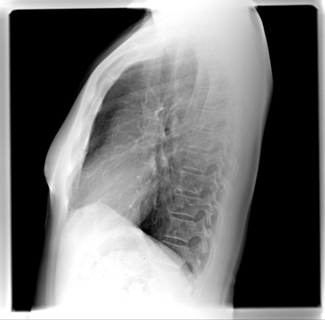

In [35]:
Image('/mnt/workspace/padchest/images-small/216840111366964013340662495472012125103608026_01-035-143.png')

In [36]:
train_df.loc[train_df.source == 'BIMCV-COVID19']

,source,images_path,findings,impression,images_path_old
7,BIMCV-COVID19,['/mnt/researchers/denis-parra/datasets/interp...,The radiology of the explored anatomical regio...,NaN,['data/bimcv-covid19//images/sub-S320886_ses-E...
20,BIMCV-COVID19,['/mnt/researchers/denis-parra/datasets/interp...,Small peripheral bilateral alveolar infiltrate...,NaN,['data/bimcv-covid19//images/sub-S318760_ses-E...
30,BIMCV-COVID19,['/mnt/researchers/denis-parra/datasets/interp...,Portable ap chest x-ray showing an endotrachea...,NaN,['data/bimcv-covid19//images/sub-S317990_ses-E...
33,BIMCV-COVID19,['/mnt/researchers/denis-parra/datasets/interp...,Chest x-ray. it is compared with the radiograp...,NaN,['data/bimcv-covid19//images/sub-S308655_ses-E...
44,BIMCV-COVID19,['/mnt/researchers/denis-parra/datasets/interp...,Information on covid. ap chest x-ray. it is co...,NaN,['data/bimcv-covid19//images/sub-S317470_ses-E...
...,...,...,...,...,...
333169,BIMCV-COVID19,['/mnt/researchers/denis-parra/datasets/interp...,Stability of lung opacities compared to previo...,NaN,['data/bimcv-covid19//images/sub-S311244_ses-E...
333171,BIMCV-COVID19,['/mnt/researchers/denis-parra/datasets/interp...,"This is compared with the x-ray from march 21,...",NaN,['data/bimcv-covid19//images/sub-S03490_ses-E0...
333193,BIMCV-COVID19,['/mnt/researchers/denis-parra/datasets/interp...,Without significant alterations.,NaN,['data/bimcv-covid19//images/sub-S312393_ses-E...
333201,BIMCV-COVID19,['/mnt/researchers/denis-parra/datasets/interp...,The same opacities recorded persist without ch...,NaN,['data/bimcv-covid19//images/sub-S310145_ses-E...


In [61]:
max((len(x), x) for x in train_df.loc[train_df.source == 'BIMCV-COVID19'].images_path_old)

(1280,
 "['data/bimcv-covid19//images/sub-S03758_ses-E08716_run-1_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-2_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-3_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-4_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-5_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-6_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-7_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-1_bp-chest_vp-ll_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-2_bp-chest_vp-ll_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-3_bp-chest_vp-ll_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-4_bp-chest_vp-ll_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-5_bp-chest_vp-ll_cr.png'\n 'data/bimcv-covid1

In [62]:
x = "['data/bimcv-covid19//images/sub-S03758_ses-E08716_run-1_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-2_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-3_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-4_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-5_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-6_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-7_bp-chest_vp-pa_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-1_bp-chest_vp-ll_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-2_bp-chest_vp-ll_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-3_bp-chest_vp-ll_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-4_bp-chest_vp-ll_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-5_bp-chest_vp-ll_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-6_bp-chest_vp-ll_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-7_bp-chest_vp-ll_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-8_bp-chest_vp-ll_cr.png'\n 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-9_bp-chest_vp-ll_cr.png']"
[eval(y) for y in x[1:-1].split()]

['data/bimcv-covid19//images/sub-S03758_ses-E08716_run-1_bp-chest_vp-pa_cr.png',
 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-2_bp-chest_vp-pa_cr.png',
 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-3_bp-chest_vp-pa_cr.png',
 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-4_bp-chest_vp-pa_cr.png',
 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-5_bp-chest_vp-pa_cr.png',
 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-6_bp-chest_vp-pa_cr.png',
 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-7_bp-chest_vp-pa_cr.png',
 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-1_bp-chest_vp-ll_cr.png',
 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-2_bp-chest_vp-ll_cr.png',
 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-3_bp-chest_vp-ll_cr.png',
 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-4_bp-chest_vp-ll_cr.png',
 'data/bimcv-covid19//images/sub-S03758_ses-E08716_run-5_bp-chest_vp-ll_cr.png',
 'data/bimcv-covid19//images

In [23]:
len("data/chexpert-public/")

21

In [56]:
len(train_df.loc[train_df.source == 'OpenI'])

3729

In [35]:
# train_df.loc[train_df.source == 'PadChest'].images_path_old.values
findings = train_df.loc[train_df.source == 'BIMCV-COVID19'].findings.values

In [36]:
findings

array(['The radiology of the explored anatomical region does not show findings of pathological significance, with the bone and soft tissue patterns being of normal characteristics.',
       'Small peripheral bilateral alveolar infiltrates in relation to multilobar pneumonia due to covid.',
       'Portable ap chest x-ray showing an endotracheal tube 4.2 cm from the carina. venous catheter with tip in superior vena cava. bilateral alveolar interstitial infiltrate predominantly in the left basal region, development of some small apical and right basal windows without changes compared to the study of the date.',
       ..., 'Without significant alterations.',
       'The same opacities recorded persist without changes as in the x-ray dated.',
       'Persistent opacity of interstitial appearance persists in the left lung base, the one on the lsd is doubtful.'],
      dtype=object)

In [55]:
len(val_df.loc[val_df.source == 'OpenI'])

97

In [61]:
eval(val_df.loc[val_df.source == 'OpenI'].images_path_old.values[0])

['data/openi/images/CXR237_IM-0930-1001.pngdata/openi/images/CXR237_IM-0930-2001.png']

In [64]:
val_df.loc[val_df.source == 'CheXpert'].images_path_old.values[1]

"['data/chexpert-public/train/patient15955/study2/view1_frontal.jpg'\n 'data/chexpert-public/train/patient15955/study2/view2_lateral.jpg']"

In [27]:
from medvqa.datasets.iuxray import get_iuxray_all_image_ids

In [29]:
iuxray_image_ids = get_iuxray_all_image_ids()
print(len(iuxray_image_ids))
print(iuxray_image_ids[0])

7470
CXR2509_IM-1031-1001


In [15]:
eval(test_public_df.images_path.values[3])

['/mnt/researchers/denis-parra/datasets/interpret-cxr-test-public-jpg/test_public/image_4_view_0.jpg',
 '/mnt/researchers/denis-parra/datasets/interpret-cxr-test-public-jpg/test_public/image_4_view_1.jpg']

In [15]:
test_public_df

,images_path,findings,impression
0,['/mnt/researchers/denis-parra/datasets/interp...,Bedside upright AP radiograph of the chest dem...,1. Mild chronic congestive heart failure with ...
1,['/mnt/researchers/denis-parra/datasets/interp...,"Since most recent chest radiograph, there has ...",Right IJ central venous catheter terminates pr...
2,['/mnt/researchers/denis-parra/datasets/interp...,NaN,There has been interval increase in right lowe...
3,['/mnt/researchers/denis-parra/datasets/interp...,"As compared to the previous radiograph, the kn...",NaN
4,['/mnt/researchers/denis-parra/datasets/interp...,There are no focal opacities. The patient has ...,No evidence of acute cardiopulmonary process.
...,...,...,...
3672,['/mnt/researchers/denis-parra/datasets/interp...,"The lungs are clear. There is no effusion, con...",Normal chest x-ray.
3673,['/mnt/researchers/denis-parra/datasets/interp...,Lungs are relatively hyperinflated with the ca...,No definite acute cardiopulmonary process.
3674,['/mnt/researchers/denis-parra/datasets/interp...,The lungs are well expanded and clear. Coarsen...,No acute cardiopulmonary process. Unchanged ca...
3675,['/mnt/researchers/denis-parra/datasets/interp...,Bibasilar opacities are again seen silhouettin...,Moderate bilateral pleural effusions with adja...


In [16]:
test_hidden_df

,images_path,findings,impression
0,['/mnt/researchers/denis-parra/datasets/interp...,NaN,to_generate
1,['/mnt/researchers/denis-parra/datasets/interp...,NaN,to_generate
2,['/mnt/researchers/denis-parra/datasets/interp...,to_generate,to_generate
3,['/mnt/researchers/denis-parra/datasets/interp...,NaN,to_generate
4,['/mnt/researchers/denis-parra/datasets/interp...,to_generate,to_generate
...,...,...,...
1688,['/mnt/researchers/denis-parra/datasets/interp...,to_generate,to_generate
1689,['/mnt/researchers/denis-parra/datasets/interp...,NaN,to_generate
1690,['/mnt/researchers/denis-parra/datasets/interp...,NaN,to_generate
1691,['/mnt/researchers/denis-parra/datasets/interp...,to_generate,to_generate


In [67]:
!python ../../scripts/interpret_cxr/export_splits.py \
--data_dir \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/" \
--output_dir \
"/mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/"

MIMIC-CXR splits already exist at /mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/mimiccxr_splits.pkl
CheXpert splits already exist at /mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/chexpert_splits.pkl
OpenI splits already exist at /mnt/data/pamessina/workspaces/medvqa-workspace/cache/interpret-cxr-challenge/openi_splits.pkl
Done


In [52]:
'data/chexpert-public/train/patient02130/study1/view2_lateral.jpg'.split('.jpg')

['data/chexpert-public/train/patient02130/study1/view2_lateral', '']

In [39]:
import pandas as pd
from medvqa.datasets.chexpert import CHEXPERT_TEST_LABELS_CSV_PATH, CHEXPERT_TRAIN_VAL_CSV_PATH
chexpert_train_val_df = pd.read_csv(CHEXPERT_TRAIN_VAL_CSV_PATH)

In [41]:
len('CheXpert-v1.0-small')

19

In [44]:
tmp  = chexpert_train_val_df.Path.values

In [48]:
tmp[0][20:]

'train/patient00001/study1/view1_frontal.jpg'

In [16]:
from medvqa.utils.common import INTERPRET_CXR_TEST_PUBLIC_CSV_PATH

In [18]:
df = pd.read_csv(INTERPRET_CXR_TEST_PUBLIC_CSV_PATH)

In [22]:
eval(df.images_path[0])

['/mnt/researchers/denis-parra/datasets/interpret-cxr-test-public-jpg/test_public/image_1_view_0.jpg']

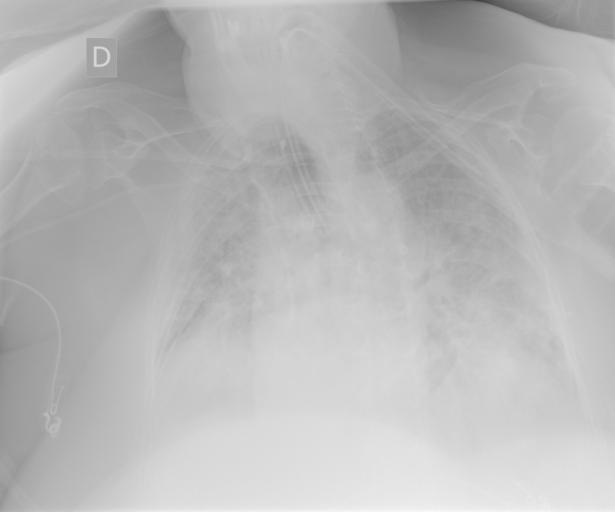

In [65]:
Image('/mnt/workspace/BIMCV_COVID19/images/image_100011_view_0.jpg')